In [4]:
!pip install pystan==2.19.1.1

use conda to install prophet and plotly to environment
```conda install -c conda-forge fbprophet -y
conda install plotly -y```


Make text ITALIC: *Italic*
Make text BOLD: **Bold**
List item as a bullet: dash and space -
List item as a number: Simple as number and dot 1.
Indenting text: Greater than and space >
Inline code span: Back quotation mark " ` "
Block of code: Triple back quotation marks " ``` "
Link a section: [Title of Section](#title-of-section)
Hyperlink: [Text](URL)

In [22]:
import fbprophet

In [4]:
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [11]:
import pandas as pd
from pandas import read_csv
from pandas import to_datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'data\NASDAQ-1-YEAR- DAILY.csv')

<AxesSubplot:>

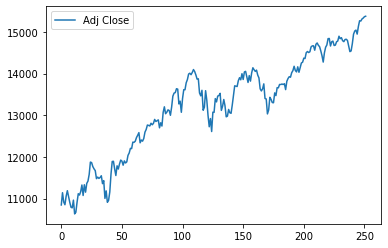

In [18]:
df.plot(y="Adj Close")

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,10900.700195,11131.500000,10837.200195,10847.690430,10847.690430,3872230000
1,2020-09-09,11064.759766,11217.690430,10970.450195,11141.559570,11141.559570,3531780000
2,2020-09-10,11235.530273,11299.530273,10875.019531,10919.589844,10919.589844,3814100000
3,2020-09-11,11010.070313,11033.040039,10728.030273,10853.549805,10853.549805,3609190000
4,2020-09-14,11010.139648,11118.290039,10982.259766,11056.650391,11056.650391,3716820000


In [9]:
# yt = yt-y(t-1) 
df['Close_shift'] = df['Adj Close'] - df['Adj Close'].shift(1)
y = df['Close_shift']

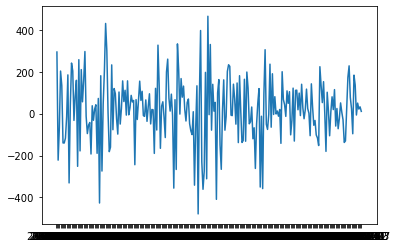

In [13]:
plt.plot(df['Date'],df['Close_shift'])
plt.show()

In [18]:
df_fbphophet = df.rename(columns={'Date':'ds', 'Close_shift':'y'})
df_fbphophet.head()
train_data_len = int(0.8*len(df))
df_train = df_fbphophet[:train_data_len]
df_test = df_fbphophet[train_data_len:]
df_train.head(), df_train.shape

(           ds          Open          High           Low         Close  \
 0  2020-09-08  10900.700195  11131.500000  10837.200195  10847.690430   
 1  2020-09-09  11064.759766  11217.690430  10970.450195  11141.559570   
 2  2020-09-10  11235.530273  11299.530273  10875.019531  10919.589844   
 3  2020-09-11  11010.070313  11033.040039  10728.030273  10853.549805   
 4  2020-09-14  11010.139648  11118.290039  10982.259766  11056.650391   
 
       Adj Close      Volume           y  
 0  10847.690430  3872230000         NaN  
 1  11141.559570  3531780000  293.869140  
 2  10919.589844  3814100000 -221.969726  
 3  10853.549805  3609190000  -66.040039  
 4  11056.650391  3716820000  203.100586  ,
 (201, 8))

In [23]:
model = fbprophet.Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future_dates = model.make_future_dataframe(periods=len(df)-len(df_train))

In [25]:
prediction = model.predict(future_dates)

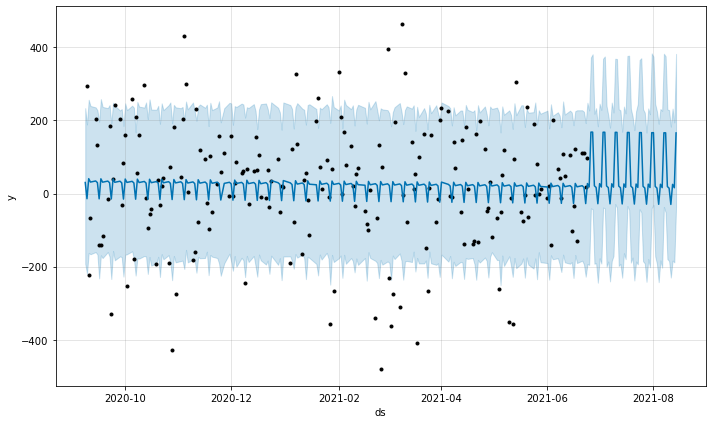

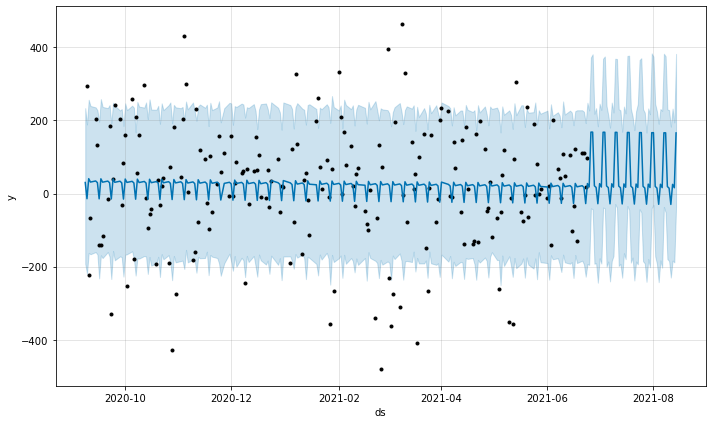

In [26]:
model.plot(prediction)

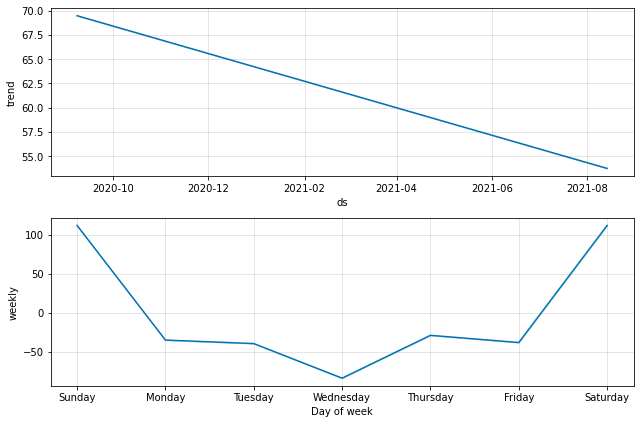

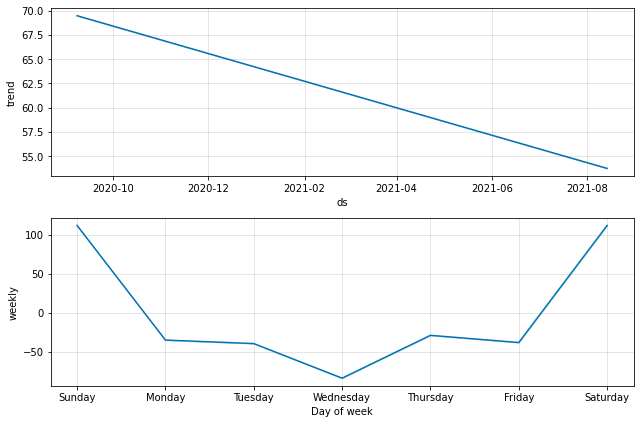

In [27]:
model.plot_components(prediction)

In [28]:
from fbprophet.diagnostics import cross_validation

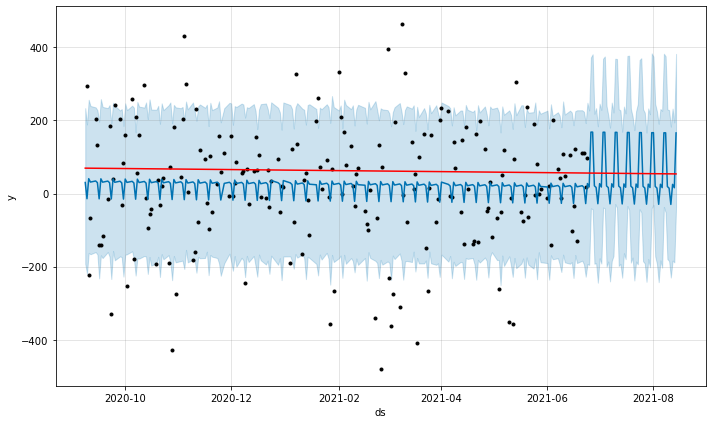

In [29]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)